In [3]:
#!pip install selenium

In [3]:
from jupyter_dash import JupyterDash
import os

# dash libs
import dash
from dash.dependencies import Input, Output
import dash_core_components as dcc
import dash_html_components as html
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px

In [2]:
%matplotlib inline
from selenium import webdriver
from pandas import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import *
from bs4 import BeautifulSoup
import seaborn as sn
from scipy import stats
from scipy.stats import linregress

In [3]:
def get_nba_url(url):
    driver = webdriver.Chrome(executable_path=r'C:\Users\chris\OneDrive\nba_hustle_stats\chromedriver.exe')
    driver.get(url)
    htmlSource = driver.page_source
    
    soup = BeautifulSoup(htmlSource, 'html.parser')
    table = soup.find('div', class_='nba-stat-table__overflow')
    df_list = pd.read_html(table.prettify())
    df = df_list[0]
    return df

In [4]:
hustle19 = get_nba_url('https://stats.nba.com/teams/hustle/?Season=2018-19&SeasonType=Regular%20Season')
hustle19.head(3)

,TEAM,MIN,Screen Assists,Screen Assists PTS,Deflections,OFF Loose Balls Recovered,DEF Loose Balls Recovered,Loose Balls Recovered,% Loose Balls Recovered OFF,% Loose Balls Recovered DEF,Charges Drawn,Contested 2PT Shots,Contested 3PT Shots,Contested Shots
0,Atlanta Hawks,96.9,8.0,18.2,14.5,4.5,5.0,9.5,47.0,53.0,0.51,38.0,25.2,63.2
1,Boston Celtics,96.5,8.6,20.0,14.1,3.2,5.1,8.3,38.9,61.1,0.67,35.9,26.4,62.3
2,Brooklyn Nets,97.5,11.0,26.2,12.1,3.8,4.2,8.0,47.8,52.2,0.32,44.5,22.2,66.7


In [7]:
hustle19['TEAM'] = hustle19['TEAM'].apply(lambda x: '2019 ' + x)
hustle19.head(3)

,TEAM,MIN,Screen Assists,Screen Assists PTS,Deflections,OFF Loose Balls Recovered,DEF Loose Balls Recovered,Loose Balls Recovered,% Loose Balls Recovered OFF,% Loose Balls Recovered DEF,Charges Drawn,Contested 2PT Shots,Contested 3PT Shots,Contested Shots
0,2019 Atlanta Hawks,96.9,8.0,18.2,14.5,4.5,5.0,9.5,47.0,53.0,0.51,38.0,25.2,63.2
1,2019 Boston Celtics,96.5,8.6,20.0,14.1,3.2,5.1,8.3,38.9,61.1,0.67,35.9,26.4,62.3
2,2019 Brooklyn Nets,97.5,11.0,26.2,12.1,3.8,4.2,8.0,47.8,52.2,0.32,44.5,22.2,66.7


In [8]:
hustle18 = get_nba_url('https://stats.nba.com/teams/hustle/?Season=2017-18&SeasonType=Regular%20Season&sort=TEAM_NAME&dir=1')
hustle18.head(3)

,TEAM,MIN,Screen Assists,Screen Assists PTS,Deflections,OFF Loose Balls Recovered,DEF Loose Balls Recovered,Loose Balls Recovered,% Loose Balls Recovered OFF,% Loose Balls Recovered DEF,Charges Drawn,Contested 2PT Shots,Contested 3PT Shots,Contested Shots
0,Washington Wizards,96.9,10.6,23.9,14.9,3.1,4.9,8.0,38.8,61.2,0.80,37.0,21.5,58.6
1,Utah Jazz,96.4,10.5,24.4,15.1,3.1,4.9,8.0,38.8,61.2,0.27,41.2,21.4,62.6
2,Toronto Raptors,96.7,9.4,21.9,14.8,3.5,4.8,8.4,42.3,57.7,0.84,44.9,19.4,64.3


In [10]:
hustle17 = get_nba_url('https://stats.nba.com/teams/hustle/?Season=2016-17&SeasonType=Regular%20Season')
hustle17.head(3)

,TEAM,MIN,Screen Assists,Screen Assists PTS,Deflections,OFF Loose Balls Recovered,DEF Loose Balls Recovered,Loose Balls Recovered,% Loose Balls Recovered OFF,% Loose Balls Recovered DEF,Charges Drawn,Contested 2PT Shots,Contested 3PT Shots,Contested Shots
0,Atlanta Hawks,97.0,10.8,23.8,16.8,0.0,0.0,6.7,0.0,0.0,0.95,40.5,23.9,64.3
1,Boston Celtics,96.4,10.0,23.5,15.4,0.0,0.0,7.5,0.0,0.0,0.76,40.5,22.8,63.2
2,Brooklyn Nets,96.4,7.8,18.0,14.4,0.0,0.0,7.1,0.0,0.0,0.56,49.1,22.4,71.5


In [19]:
hustle20 = get_nba_url('https://stats.nba.com/teams/hustle/?Season=2019-20&SeasonType=Regular%20Season')
hustle20.head(3)

,TEAM,MIN,Screen Assists,Screen Assists PTS,Deflections,OFF Loose Balls Recovered,DEF Loose Balls Recovered,Loose Balls Recovered,% Loose Balls Recovered OFF,% Loose Balls Recovered DEF,Charges Drawn,Contested 2PT Shots,Contested 3PT Shots,Contested Shots
0,Atlanta Hawks,97.2,8.0,18.7,14.9,3.5,3.6,7.2,49.5,50.5,0.43,36.9,23.7,60.6
1,Boston Celtics,96.8,11.3,26.8,16.9,3.7,3.9,7.6,48.3,51.7,0.89,35.2,26.2,61.4
2,Brooklyn Nets,97.3,10.4,24.9,12.2,3.6,3.8,7.4,48.8,51.2,0.45,41.1,24.0,65.1


In [20]:
hustle18['TEAM'] = hustle18['TEAM'].apply(lambda x: '2018 ' + x)
hustle17['TEAM'] = hustle17['TEAM'].apply(lambda x: '2017 ' + x)
hustle20['TEAM'] = hustle20['TEAM'].apply(lambda x: '2020 ' + x)
hustle20.head(3)

,TEAM,MIN,Screen Assists,Screen Assists PTS,Deflections,OFF Loose Balls Recovered,DEF Loose Balls Recovered,Loose Balls Recovered,% Loose Balls Recovered OFF,% Loose Balls Recovered DEF,Charges Drawn,Contested 2PT Shots,Contested 3PT Shots,Contested Shots
0,2020 Atlanta Hawks,97.2,8.0,18.7,14.9,3.5,3.6,7.2,49.5,50.5,0.43,36.9,23.7,60.6
1,2020 Boston Celtics,96.8,11.3,26.8,16.9,3.7,3.9,7.6,48.3,51.7,0.89,35.2,26.2,61.4
2,2020 Brooklyn Nets,97.3,10.4,24.9,12.2,3.6,3.8,7.4,48.8,51.2,0.45,41.1,24.0,65.1


In [21]:
hustle = pd.concat([hustle20, hustle19, hustle18, hustle17])
hustle

,TEAM,MIN,Screen Assists,Screen Assists PTS,Deflections,OFF Loose Balls Recovered,DEF Loose Balls Recovered,Loose Balls Recovered,% Loose Balls Recovered OFF,% Loose Balls Recovered DEF,Charges Drawn,Contested 2PT Shots,Contested 3PT Shots,Contested Shots
0,2020 Atlanta Hawks,97.2,8.0,18.7,14.9,3.5,3.6,7.2,49.5,50.5,0.43,36.9,23.7,60.6
1,2020 Boston Celtics,96.8,11.3,26.8,16.9,3.7,3.9,7.6,48.3,51.7,0.89,35.2,26.2,61.4
2,2020 Brooklyn Nets,97.3,10.4,24.9,12.2,3.6,3.8,7.4,48.8,51.2,0.45,41.1,24.0,65.1
3,2020 Charlotte Hornets,96.9,7.3,17.5,13.7,3.9,3.6,7.5,51.4,48.6,0.77,33.5,25.8,59.3
4,2020 Chicago Bulls,96.5,9.1,20.7,17.4,3.8,4.4,8.2,46.0,54.0,0.95,33.1,23.3,56.3
5,2020 Cleveland Cavaliers,96.8,10.1,23.0,12.5,3.9,3.4,7.3,53.7,46.3,0.55,33.3,22.7,56.0
6,2020 Dallas Mavericks,96.6,9.0,21.1,12.7,3.3,3.6,6.9,48.2,51.8,0.64,39.5,23.5,63.0
7,2020 Denver Nuggets,96.9,8.9,19.9,15.7,3.4,3.9,7.3,47.0,53.0,0.57,32.7,24.0,56.6
8,2020 Detroit Pistons,96.8,9.1,20.9,14.6,3.6,3.8,7.4,49.1,50.9,0.38,38.0,21.4,59.5
9,2020 Golden State Warriors,96.8,10.7,25.2,15.5,3.5,3.8,7.3,47.7,52.3,0.58,37.5,26.5,64.0


In [14]:
adv19 = get_nba_url('https://stats.nba.com/teams/advanced/?sort=W&dir=-1&Season=2018-19&SeasonType=Regular%20Season')
adv19.head(3)

,Unnamed: 0,TEAM,GP,W,L,MIN,OffRtg,DefRtg,NetRtg,AST%,...,AST/TO RANK,AST Ratio RANK,OREB% RANK,DREB% RANK,REB% RANK,TO Ratio RANK,eFG% RANK,TS% RANK,PACE RANK,PIE RANK
0,1,Milwaukee Bucks,82,60,22,3956.0,113.5,104.9,8.6,60.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Toronto Raptors,82,58,24,3976.0,112.6,106.8,5.8,60.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Golden State Warriors,82,57,25,3961.0,115.0,108.6,6.5,66.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
adv19.columns

Index(['Unnamed: 0', 'TEAM', 'GP', 'W', 'L', 'MIN', 'OffRtg', 'DefRtg',
       'NetRtg', 'AST%', 'AST/TO', 'AST  Ratio', 'OREB%', 'DREB%', 'REB%',
       'TOV%', 'eFG%', 'TS%', 'PACE', 'PIE', 'GP RANK', 'W RANK', 'L RANK',
       'MIN RANK', 'OffRtg RANK', 'DefRtg RANK', 'NetRtg RANK', 'AST% RANK',
       'AST/TO RANK', 'AST  Ratio RANK', 'OREB% RANK', 'DREB% RANK',
       'REB% RANK', 'TO  Ratio RANK', 'eFG% RANK', 'TS% RANK', 'PACE RANK',
       'PIE RANK'],
      dtype='object')

In [17]:
adv18 = get_nba_url('https://stats.nba.com/teams/advanced/?sort=W&dir=-1&Season=2017-18&SeasonType=Regular%20Season')
adv18.head(3)

,Unnamed: 0,TEAM,GP,W,L,MIN,OffRtg,DefRtg,NetRtg,AST%,...,AST/TO RANK,AST Ratio RANK,OREB% RANK,DREB% RANK,REB% RANK,TO Ratio RANK,eFG% RANK,TS% RANK,PACE RANK,PIE RANK
0,1,Houston Rockets,82,65,17,3951.0,114.1,105.7,8.4,55.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Toronto Raptors,82,59,23,3966.0,113.0,105.3,7.7,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Golden State Warriors,82,58,24,3946.0,112.8,106.8,5.9,68.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
adv17 = get_nba_url('https://stats.nba.com/teams/advanced/?sort=W&dir=-1&Season=2016-17&SeasonType=Regular%20Season')
adv17.head(3)

,Unnamed: 0,TEAM,GP,W,L,MIN,OffRtg,DefRtg,NetRtg,AST%,...,AST/TO RANK,AST Ratio RANK,OREB% RANK,DREB% RANK,REB% RANK,TO Ratio RANK,eFG% RANK,TS% RANK,PACE RANK,PIE RANK
0,1,Golden State Warriors,82,67,15,3956.0,114.8,103.4,11.4,70.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,San Antonio Spurs,82,61,21,3961.0,110.3,102.9,7.4,60.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Houston Rockets,82,55,27,3956.0,114.1,108.4,5.7,62.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
adv20 = get_nba_url('https://stats.nba.com/teams/advanced/?sort=W&dir=-1')
adv20.head(3)

,Unnamed: 0,TEAM,GP,W,L,MIN,OffRtg,DefRtg,NetRtg,AST%,...,AST/TO RANK,AST Ratio RANK,OREB% RANK,DREB% RANK,REB% RANK,TO Ratio RANK,eFG% RANK,TS% RANK,PACE RANK,PIE RANK
0,1,Milwaukee Bucks,65,53,12,3130.0,112.3,101.6,10.7,59.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Los Angeles Lakers,63,49,14,3034.0,112.6,105.5,7.1,60.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Toronto Raptors,64,46,18,3092.0,111.3,104.9,6.4,62.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
adv19['TEAM'] = adv19['TEAM'].apply(lambda x: '2019 ' + x)
adv18['TEAM'] = adv18['TEAM'].apply(lambda x: '2018 ' + x)
adv17['TEAM'] = adv17['TEAM'].apply(lambda x: '2017 ' + x)
adv20['TEAM'] = adv20['TEAM'].apply(lambda x: '2020 ' + x)

In [27]:
adv = pd.concat([adv19, adv18, adv17, adv20])
adv

,Unnamed: 0,TEAM,GP,W,L,MIN,OffRtg,DefRtg,NetRtg,AST%,...,AST/TO RANK,AST Ratio RANK,OREB% RANK,DREB% RANK,REB% RANK,TO Ratio RANK,eFG% RANK,TS% RANK,PACE RANK,PIE RANK
0,1,2019 Milwaukee Bucks,82,60,22,3956.0,113.5,104.9,8.6,60.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019 Toronto Raptors,82,58,24,3976.0,112.6,106.8,5.8,60.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019 Golden State Warriors,82,57,25,3961.0,115.0,108.6,6.5,66.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019 Denver Nuggets,82,54,28,3946.0,112.1,108.1,4.0,65.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019 Houston Rockets,82,53,29,3966.0,114.9,110.1,4.8,54.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,2019 Portland Trail Blazers,82,53,29,3971.0,113.7,109.5,4.2,54.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,2019 Philadelphia 76ers,82,51,31,3961.0,111.6,109.0,2.6,64.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,2019 Utah Jazz,82,50,32,3951.0,110.3,105.3,5.0,64.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2019 Boston Celtics,82,49,33,3956.0,111.3,107.0,4.3,62.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,2019 Oklahoma City Thunder,82,49,33,3971.0,109.8,106.5,3.4,54.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
adv.drop(columns=['GP RANK', 'W RANK', 'L RANK',
       'MIN RANK', 'OffRtg RANK', 'DefRtg RANK', 'NetRtg RANK', 'AST% RANK',
       'AST/TO RANK', 'AST  Ratio RANK', 'OREB% RANK', 'DREB% RANK',
       'REB% RANK', 'TO  Ratio RANK', 'eFG% RANK', 'TS% RANK', 'PACE RANK',
       'PIE RANK', 'Unnamed: 0'], inplace=True)
adv.head(3)

,TEAM,GP,W,L,MIN,OffRtg,DefRtg,NetRtg,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TOV%,eFG%,TS%,PACE,PIE
0,2019 Milwaukee Bucks,82,60,22,3956.0,113.5,104.9,8.6,60.1,1.88,18.3,25.0,75.7,51.6,13.3,55.0,58.3,103.57,55.3
1,2019 Toronto Raptors,82,58,24,3976.0,112.6,106.8,5.8,60.3,1.81,18.2,26.5,72.6,50.2,13.8,54.3,57.9,100.52,53.3
2,2019 Golden State Warriors,82,57,25,3961.0,115.0,108.6,6.5,66.8,2.06,20.4,25.7,72.7,50.5,13.9,56.5,59.6,101.73,54.6


In [29]:
trad19 = get_nba_url('https://stats.nba.com/teams/traditional/?sort=PLUS_MINUS&dir=-1&Season=2018-19&SeasonType=Regular%20Season')
trad19

,Unnamed: 0,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,DREB RANK,REB RANK,AST RANK,TOV RANK,STL RANK,BLK RANK,BLKA RANK,PF RANK,PFD RANK,+/- RANK
0,1,Milwaukee Bucks,82,60,22,0.732,48.2,118.1,43.4,91.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Golden State Warriors,82,57,25,0.695,48.3,117.7,44.0,89.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Toronto Raptors,82,58,24,0.707,48.5,114.4,42.2,89.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Utah Jazz,82,50,32,0.610,48.2,111.7,40.4,86.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Houston Rockets,82,53,29,0.646,48.4,113.9,39.2,87.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Boston Celtics,82,49,33,0.598,48.2,112.4,42.1,90.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Portland Trail Blazers,82,53,29,0.646,48.4,114.7,42.3,90.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Denver Nuggets,82,54,28,0.659,48.1,110.7,41.9,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Oklahoma City Thunder,82,49,33,0.598,48.4,114.5,42.6,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Indiana Pacers,82,48,34,0.585,48.1,108.0,41.3,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
trad19.columns

Index(['Unnamed: 0', 'TEAM', 'GP', 'W', 'L', 'WIN%', 'MIN', 'PTS', 'FGM',
       'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', '+/-',
       'GP RANK', 'W RANK', 'L RANK', 'WIN% RANK', 'MIN RANK', 'PTS RANK',
       'FGM RANK', 'FGA RANK', 'FG% RANK', '3PM RANK', '3PA RANK', '3P% RANK',
       'FTM RANK', 'FTA RANK', 'FT% RANK', 'OREB RANK', 'DREB RANK',
       'REB RANK', 'AST RANK', 'TOV RANK', 'STL RANK', 'BLK RANK', 'BLKA RANK',
       'PF RANK', 'PFD RANK', '+/- RANK'],
      dtype='object')

In [32]:
trad18 =  get_nba_url('https://stats.nba.com/teams/traditional/?sort=PLUS_MINUS&dir=-1&Season=2017-18&SeasonType=Regular%20Season')
trad18.head(3)

,Unnamed: 0,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,DREB RANK,REB RANK,AST RANK,TOV RANK,STL RANK,BLK RANK,BLKA RANK,PF RANK,PFD RANK,+/- RANK
0,1,Houston Rockets,82,65,17,0.793,48.2,112.4,38.7,84.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Toronto Raptors,82,59,23,0.720,48.4,111.7,41.3,87.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Golden State Warriors,82,58,24,0.707,48.1,113.5,42.8,85.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
trad17 = get_nba_url('https://stats.nba.com/teams/traditional/?sort=PLUS_MINUS&dir=-1&Season=2016-17&SeasonType=Regular%20Season')
trad17.head(3)

,Unnamed: 0,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,DREB RANK,REB RANK,AST RANK,TOV RANK,STL RANK,BLK RANK,BLKA RANK,PF RANK,PFD RANK,+/- RANK
0,1,Golden State Warriors,82,67,15,0.817,48.2,115.9,43.1,87.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,San Antonio Spurs,82,61,21,0.744,48.3,105.3,39.3,83.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Houston Rockets,82,55,27,0.671,48.2,115.3,40.3,87.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
trad20 = get_nba_url('https://stats.nba.com/teams/traditional/?sort=W_PCT&dir=-1')
trad20.head(3)

,Unnamed: 0,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,DREB RANK,REB RANK,AST RANK,TOV RANK,STL RANK,BLK RANK,BLKA RANK,PF RANK,PFD RANK,+/- RANK
0,1,Milwaukee Bucks,65,53,12,0.815,48.2,118.6,43.5,91.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Los Angeles Lakers,63,49,14,0.778,48.2,114.3,42.9,88.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Toronto Raptors,64,46,18,0.719,48.3,113.0,40.6,88.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
trad19['TEAM'] = trad19['TEAM'].apply(lambda x: '2019 ' + x)
trad18['TEAM'] = trad18['TEAM'].apply(lambda x: '2018 ' + x)
trad17['TEAM'] = trad17['TEAM'].apply(lambda x: '2017 ' + x)
trad20['TEAM'] = trad20['TEAM'].apply(lambda x: '2020 ' + x)
trad20.head(3)

,Unnamed: 0,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,DREB RANK,REB RANK,AST RANK,TOV RANK,STL RANK,BLK RANK,BLKA RANK,PF RANK,PFD RANK,+/- RANK
0,1,2020 Milwaukee Bucks,65,53,12,0.815,48.2,118.6,43.5,91.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2020 Los Angeles Lakers,63,49,14,0.778,48.2,114.3,42.9,88.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2020 Toronto Raptors,64,46,18,0.719,48.3,113.0,40.6,88.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
traditional = pd.concat([trad19, trad18, trad17, trad20])
traditional

,Unnamed: 0,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,DREB RANK,REB RANK,AST RANK,TOV RANK,STL RANK,BLK RANK,BLKA RANK,PF RANK,PFD RANK,+/- RANK
0,1,2019 Milwaukee Bucks,82,60,22,0.732,48.2,118.1,43.4,91.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019 Golden State Warriors,82,57,25,0.695,48.3,117.7,44.0,89.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019 Toronto Raptors,82,58,24,0.707,48.5,114.4,42.2,89.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019 Utah Jazz,82,50,32,0.610,48.2,111.7,40.4,86.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019 Houston Rockets,82,53,29,0.646,48.4,113.9,39.2,87.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,2019 Boston Celtics,82,49,33,0.598,48.2,112.4,42.1,90.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,2019 Portland Trail Blazers,82,53,29,0.646,48.4,114.7,42.3,90.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,2019 Denver Nuggets,82,54,28,0.659,48.1,110.7,41.9,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2019 Oklahoma City Thunder,82,49,33,0.598,48.4,114.5,42.6,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,2019 Indiana Pacers,82,48,34,0.585,48.1,108.0,41.3,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
traditional.drop(columns=['Unnamed: 0', 'GP RANK', 'W RANK', 'L RANK', 'WIN% RANK', 'MIN RANK', 'PTS RANK',
       'FGM RANK', 'FGA RANK', 'FG% RANK', '3PM RANK', '3PA RANK', '3P% RANK',
       'FTM RANK', 'FTA RANK', 'FT% RANK', 'OREB RANK', 'DREB RANK',
       'REB RANK', 'AST RANK', 'TOV RANK', 'STL RANK', 'BLK RANK', 'BLKA RANK',
       'PF RANK', 'PFD RANK', '+/- RANK'], inplace=True)
traditional.head(3)

,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,2019 Milwaukee Bucks,82,60,22,0.732,48.2,118.1,43.4,91.1,47.6,...,40.4,49.7,26.0,13.9,7.5,5.9,4.8,19.6,20.2,8.9
1,2019 Golden State Warriors,82,57,25,0.695,48.3,117.7,44.0,89.8,49.1,...,36.5,46.2,29.4,14.3,7.6,6.4,3.6,21.4,19.5,6.5
2,2019 Toronto Raptors,82,58,24,0.707,48.5,114.4,42.2,89.1,47.4,...,35.6,45.2,25.4,14.0,8.3,5.3,4.5,21.0,20.5,6.1


In [38]:
opp20 = get_nba_url('https://stats.nba.com/teams/opponent/?sort=W&dir=-1')
opp20.head(3)

,Unnamed: 0,TEAM,GP,W,L,MIN,Opp FGM,Opp FGA,Opp FG%,Opp 3PM,...,Opp REB RANK,Opp AST RANK,Opp TOV RANK,Opp STL RANK,Opp BLK RANK,Opp BLKA RANK,Opp PF RANK,Opp PFD RANK,Opp PTS RANK,+/- RANK
0,1,Milwaukee Bucks,65,53,12,48.2,38.7,93.8,41.3,13.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Los Angeles Lakers,63,49,14,48.2,39.0,87.7,44.4,11.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Toronto Raptors,64,46,18,48.3,37.9,88.5,42.9,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
opp19 = get_nba_url('https://stats.nba.com/teams/opponent/?sort=W&dir=-1&Season=2018-19&SeasonType=Regular%20Season')
opp19.head(3)

,Unnamed: 0,TEAM,GP,W,L,MIN,Opp FGM,Opp FGA,Opp FG%,Opp 3PM,...,Opp REB RANK,Opp AST RANK,Opp TOV RANK,Opp STL RANK,Opp BLK RANK,Opp BLKA RANK,Opp PF RANK,Opp PFD RANK,Opp PTS RANK,+/- RANK
0,1,Milwaukee Bucks,82,60,22,48.2,40.5,93.5,43.3,13.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Toronto Raptors,82,58,24,48.5,40.3,89.7,44.9,10.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Golden State Warriors,82,57,25,48.3,40.4,91.1,44.4,11.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
opp18 = get_nba_url('https://stats.nba.com/teams/opponent/?sort=W&dir=-1&Season=2017-18&SeasonType=Regular%20Season')
opp18.head(3)

,Unnamed: 0,TEAM,GP,W,L,MIN,Opp FGM,Opp FGA,Opp FG%,Opp 3PM,...,Opp REB RANK,Opp AST RANK,Opp TOV RANK,Opp STL RANK,Opp BLK RANK,Opp BLKA RANK,Opp PF RANK,Opp PFD RANK,Opp PTS RANK,+/- RANK
0,1,Houston Rockets,82,65,17,48.2,39.6,85.6,46.2,10.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Toronto Raptors,82,59,23,48.4,38.4,85.6,44.9,8.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Golden State Warriors,82,58,24,48.1,40.2,90.0,44.7,10.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
opp17 = get_nba_url('https://stats.nba.com/teams/opponent/?sort=W&dir=-1&Season=2016-17&SeasonType=Regular%20Season')
opp17.head(3)

,Unnamed: 0,TEAM,GP,W,L,MIN,Opp FGM,Opp FGA,Opp FG%,Opp 3PM,...,Opp REB RANK,Opp AST RANK,Opp TOV RANK,Opp STL RANK,Opp BLK RANK,Opp BLKA RANK,Opp PF RANK,Opp PFD RANK,Opp PTS RANK,+/- RANK
0,1,Golden State Warriors,82,67,15,48.2,38.8,89.2,43.5,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,San Antonio Spurs,82,61,21,48.3,37.0,83.4,44.3,8.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Houston Rockets,82,55,27,48.2,41.2,88.9,46.3,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
opp20['TEAM'] = opp20['TEAM'].apply(lambda x: '2020 ' + x)
opp19['TEAM'] = opp19['TEAM'].apply(lambda x: '2019 ' + x)
opp18['TEAM'] = opp18['TEAM'].apply(lambda x: '2018 ' + x)
opp17['TEAM'] = opp17['TEAM'].apply(lambda x: '2017 ' + x)
opp17.head(3)

,Unnamed: 0,TEAM,GP,W,L,MIN,Opp FGM,Opp FGA,Opp FG%,Opp 3PM,Opp 3PA,Opp 3P%,Opp FTM,Opp FTA,Opp FT%,Opp OREB,Opp DREB,Opp REB,Opp AST,Opp TOV,Opp STL,Opp BLK,Opp BLKA,Opp PF,Opp PFD,Opp PTS,+/-,GP RANK,W RANK,L RANK,MIN RANK,Opp FGM RANK,Opp FGA RANK,Opp FG% RANK,Opp 3PM RANK,Opp 3PA RANK,Opp 3P% RANK,Opp FTM RANK,Opp FTA RANK,Opp FT% RANK,Opp OREB RANK,Opp DREB RANK,Opp REB RANK,Opp AST RANK,Opp TOV RANK,Opp STL RANK,Opp BLK RANK,Opp BLKA RANK,Opp PF RANK,Opp PFD RANK,Opp PTS RANK,+/- RANK
0,1,2017 Golden State Warriors,82,67,15,48.2,38.8,89.2,43.5,9.0,27.8,32.4,17.7,23.2,76.1,11.7,31.8,43.5,22.7,15.5,8.6,3.8,6.8,19.4,19.3,104.3,-11.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2017 San Antonio Spurs,82,61,21,48.3,37.0,83.4,44.3,8.1,23.7,34.4,16.0,20.8,77.1,9.8,31.7,41.5,21.4,14.4,7.5,4.1,5.9,19.8,18.3,98.1,-7.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2017 Houston Rockets,82,55,27,48.2,41.2,88.9,46.3,10.0,29.1,34.3,17.3,22.2,77.8,10.7,33.4,44.1,24.1,15.1,8.5,5.0,4.3,20.4,19.9,109.6,-5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
opponent = pd.concat([opp20, opp19, opp18, opp17])
opponent.head(3)

,Unnamed: 0,TEAM,GP,W,L,MIN,Opp FGM,Opp FGA,Opp FG%,Opp 3PM,Opp 3PA,Opp 3P%,Opp FTM,Opp FTA,Opp FT%,Opp OREB,Opp DREB,Opp REB,Opp AST,Opp TOV,Opp STL,Opp BLK,Opp BLKA,Opp PF,Opp PFD,Opp PTS,+/-,GP RANK,W RANK,L RANK,MIN RANK,Opp FGM RANK,Opp FGA RANK,Opp FG% RANK,Opp 3PM RANK,Opp 3PA RANK,Opp 3P% RANK,Opp FTM RANK,Opp FTA RANK,Opp FT% RANK,Opp OREB RANK,Opp DREB RANK,Opp REB RANK,Opp AST RANK,Opp TOV RANK,Opp STL RANK,Opp BLK RANK,Opp BLKA RANK,Opp PF RANK,Opp PFD RANK,Opp PTS RANK,+/- RANK
0,1,2020 Milwaukee Bucks,65,53,12,48.2,38.7,93.8,41.3,13.7,38.6,35.6,16.2,20.6,78.4,9.4,36.3,45.7,23.8,14.3,7.4,4.6,6.0,21.3,19.2,107.4,-11.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2020 Los Angeles Lakers,63,49,14,48.2,39.0,87.7,44.4,11.3,33.0,34.2,17.7,22.8,77.4,9.8,32.5,42.3,23.2,15.7,8.2,3.7,6.8,21.4,20.6,106.9,-7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2020 Toronto Raptors,64,46,18,48.3,37.9,88.5,42.9,13.0,38.5,33.7,17.7,23.0,76.8,11.2,35.1,46.3,25.6,16.8,7.0,5.3,4.9,20.0,21.5,106.5,-6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
opponent.columns.to_list()

['Unnamed: 0',
 'TEAM',
 'GP',
 'W',
 'L',
 'MIN',
 'Opp  FGM',
 'Opp  FGA',
 'Opp  FG%',
 'Opp  3PM',
 'Opp  3PA',
 'Opp  3P%',
 'Opp  FTM',
 'Opp  FTA',
 'Opp  FT%',
 'Opp  OREB',
 'Opp  DREB',
 'Opp  REB',
 'Opp  AST',
 'Opp  TOV',
 'Opp  STL',
 'Opp  BLK',
 'Opp  BLKA',
 'Opp  PF',
 'Opp  PFD',
 'Opp  PTS',
 '+/-',
 'GP RANK',
 'W RANK',
 'L RANK',
 'MIN RANK',
 'Opp  FGM RANK',
 'Opp  FGA RANK',
 'Opp  FG% RANK',
 'Opp  3PM RANK',
 'Opp  3PA RANK',
 'Opp  3P% RANK',
 'Opp  FTM RANK',
 'Opp  FTA RANK',
 'Opp  FT% RANK',
 'Opp  OREB RANK',
 'Opp  DREB RANK',
 'Opp  REB RANK',
 'Opp  AST RANK',
 'Opp  TOV RANK',
 'Opp  STL RANK',
 'Opp  BLK RANK',
 'Opp  BLKA RANK',
 'Opp  PF RANK',
 'Opp  PFD RANK',
 'Opp  PTS RANK',
 '+/- RANK']

In [163]:
opponent.drop(columns=['GP','W','L','+/-','GP RANK','W RANK','L RANK','MIN RANK','Opp  FGM RANK','Opp  FGA RANK',
                       'Opp  FG% RANK','Opp  3PM RANK','Opp  3PA RANK','Opp  3P% RANK','Opp  FTM RANK','Opp  FTA RANK',
                       'Opp  FT% RANK','Opp  OREB RANK','Opp  DREB RANK','Opp  REB RANK','Opp  AST RANK','Opp  TOV RANK','Opp  STL RANK',
                       'Opp  BLK RANK','Opp  BLKA RANK','Opp  PF RANK','Opp  PFD RANK','Opp  PTS RANK','+/- RANK'], 
             inplace=True)
opponent.head(3)

,Unnamed: 0,TEAM,MIN,Opp FGM,Opp FGA,Opp FG%,Opp 3PM,Opp 3PA,Opp 3P%,Opp FTM,Opp FTA,Opp FT%,Opp OREB,Opp DREB,Opp REB,Opp AST,Opp TOV,Opp STL,Opp BLK,Opp BLKA,Opp PF,Opp PFD,Opp PTS
0,1,2020 Milwaukee Bucks,48.2,38.7,93.8,41.3,13.7,38.6,35.6,16.2,20.6,78.4,9.4,36.3,45.7,23.8,14.3,7.4,4.6,6.0,21.3,19.2,107.4
1,2,2020 Los Angeles Lakers,48.2,39.0,87.7,44.4,11.3,33.0,34.2,17.7,22.8,77.4,9.8,32.5,42.3,23.2,15.7,8.2,3.7,6.8,21.4,20.6,106.9
2,3,2020 Toronto Raptors,48.3,37.9,88.5,42.9,13.0,38.5,33.7,17.7,23.0,76.8,11.2,35.1,46.3,25.6,16.8,7.0,5.3,4.9,20.0,21.5,106.5


In [164]:
opponent.drop(columns=['Unnamed: 0', 'MIN'], inplace=True)
opponent.columns

Index(['TEAM', 'Opp  FGM', 'Opp  FGA', 'Opp  FG%', 'Opp  3PM', 'Opp  3PA', 'Opp  3P%', 'Opp  FTM', 'Opp  FTA', 'Opp  FT%', 'Opp  OREB', 'Opp  DREB', 'Opp  REB', 'Opp  AST', 'Opp  TOV', 'Opp  STL', 'Opp  BLK', 'Opp  BLKA', 'Opp  PF', 'Opp  PFD', 'Opp  PTS'], dtype='object')

In [72]:
from functools import reduce

In [172]:
stats_frames = [hustle, traditional, adv, opponent]
#all_stats = pd.concat(stats_frames, join='outer', axis=1)

all_stats = pd.concat([df.set_index('TEAM') for df in stats_frames], axis=1, join='outer').reset_index()
#all_stats = hustle.set_index('TEAM').join([df.set_index('TEAM') for df in (traditional, adv, opponent)],
       #                                   how='inner').reset_index()

#all_stats = reduce(lambda left,right: pd.merge(left,right,on=['TEAM'], how='outer'), stats_frames)
all_stats

C:\Users\chris\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




,index,MIN,Screen Assists,Screen Assists PTS,Deflections,OFF Loose Balls Recovered,DEF Loose Balls Recovered,Loose Balls Recovered,% Loose Balls Recovered OFF,% Loose Balls Recovered DEF,Charges Drawn,Contested 2PT Shots,Contested 3PT Shots,Contested Shots,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,GP,W,L,MIN,OffRtg,DefRtg,NetRtg,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TOV%,eFG%,TS%,PACE,PIE,Opp FGM,Opp FGA,Opp FG%,Opp 3PM,Opp 3PA,Opp 3P%,Opp FTM,Opp FTA,Opp FT%,Opp OREB,Opp DREB,Opp REB,Opp AST,Opp TOV,Opp STL,Opp BLK,Opp BLKA,Opp PF,Opp PFD,Opp PTS
0,2017 Atlanta Hawks,97.0,10.8,23.8,16.8,0.0,0.0,6.7,0.0,0.0,0.95,40.5,23.9,64.3,82,43,39,0.524,48.5,103.2,38.1,84.4,45.1,8.9,26.1,34.1,18.1,24.9,72.8,10.3,34.1,44.3,23.6,15.8,8.2,4.8,5.2,18.2,21.6,-0.9,82,43,39,3976.0,104.5,105.2,-0.7,62.1,1.50,17.4,28.2,71.7,50.2,16.0,50.4,54.1,97.76,50.6,38.8,87.3,44.4,10.9,30.5,35.7,15.6,20.2,77.2,10.7,33.2,43.9,23.4,15.4,9.0,5.2,4.8,21.6,18.2,104.0
1,2017 Boston Celtics,96.4,10.0,23.5,15.4,0.0,0.0,7.5,0.0,0.0,0.76,40.5,22.8,63.2,82,53,29,0.646,48.2,108.0,38.6,85.1,45.4,12.0,33.4,35.9,18.7,23.2,80.7,9.1,32.9,42.0,25.2,13.3,7.5,4.1,5.2,20.6,20.3,2.6,82,53,29,3951.0,110.6,108.0,2.6,65.3,1.90,18.8,25.9,70.5,48.5,13.6,52.5,56.7,97.21,51.4,38.6,85.8,45.0,9.0,27.0,33.2,19.1,24.9,76.9,10.8,33.8,44.5,22.6,13.9,7.6,5.2,4.1,20.3,20.6,105.4
2,2017 Brooklyn Nets,96.4,7.8,18.0,14.4,0.0,0.0,7.1,0.0,0.0,0.56,49.1,22.4,71.5,82,20,62,0.244,48.2,105.8,37.8,85.2,44.4,10.7,31.6,33.8,19.4,24.6,78.8,8.8,35.1,43.9,21.4,16.5,7.2,4.7,5.6,21.0,20.4,-6.7,82,20,62,3951.0,103.6,110.1,-6.5,56.6,1.29,15.9,24.1,71.6,48.3,16.2,50.7,55.1,101.75,46.0,41.6,90.8,45.8,10.0,27.2,36.6,19.3,25.0,77.2,11.0,36.2,47.2,23.0,13.3,9.5,5.6,4.7,20.4,21.0,112.5
3,2017 Charlotte Hornets,96.7,13.1,30.3,13.8,0.0,0.0,6.5,0.0,0.0,0.65,42.5,25.5,68.0,82,36,46,0.439,48.4,104.9,37.7,85.4,44.2,10.0,28.6,35.1,19.4,23.8,81.5,8.8,34.8,43.6,23.1,11.5,7.0,4.8,5.5,16.6,19.9,0.2,82,36,46,3966.0,108.4,108.4,0.0,61.1,2.01,17.6,24.7,74.9,49.6,11.9,50.1,54.7,95.92,50.5,39.5,86.5,45.6,11.6,31.4,36.9,14.2,18.2,77.6,8.9,35.5,44.4,24.5,13.1,6.6,5.5,4.8,19.9,16.6,104.7
4,2017 Chicago Bulls,96.5,8.2,17.8,14.9,0.0,0.0,7.2,0.0,0.0,0.35,44.7,20.6,65.3,82,41,41,0.500,48.2,102.9,38.6,87.1,44.4,7.6,22.3,34.0,18.0,22.5,79.8,12.2,34.1,46.3,22.6,13.6,7.8,4.8,4.6,17.7,18.8,0.4,82,41,41,3956.0,106.5,106.2,0.3,58.4,1.66,16.8,31.1,73.3,51.9,14.0,48.7,53.0,96.02,50.4,39.5,86.6,45.6,8.9,25.9,34.5,14.6,19.0,77.0,10.3,32.9,43.2,23.6,13.4,7.3,4.6,4.8,18.8,17.7,102.4
5,2017 Cleveland Cavaliers,97.0,10.4,24.4,13.8,0.0,0.0,6.5,0.0,0.0,0.52,39.3,21.8,61.2,82,51,31,0.622,48.5,110.3,39.9,84.9,47.0,13.0,33.9,38.4,17.5,23.3,74.8,9.3,34.4,43.7,22.7,13.7,6.6,4.0,4.3,18.1,20.6,3.2,82,51,31,3976.0,112.8,109.7,3.1,56.7,1.66,17.1,26.4,72.2,49.9,14.0,54.7,58.0,96.74,51.0,40.6,88.8,45.8,10.4,28.7,36.1,15.5,20.0,77.3,11.0,33.2,44.2,24.7,12.6,7.3,4.3,4.0,20.6,18.1,107.2
6,2017 Dallas Mavericks,96.5,10.2,23.9,15.4,0.0,0.0,6.5,0.0,0.0,1.10,37.9,21.0,58.9,82,33,49,0.402,48.2,97.9,36.2,82.3,44.0,10.7,30.2,35.5,14.8,18.5,80.1,7.9,30.7,38.6,20.8,11.9,7.5,3.7,3.4,19.1,19.4,-2.9,82,33,49,3956.0,104.7,107.7,-3.0,57.4,1.75,16.8,21.6,73.3,46.5,12.7,50.5,54.1,93.11,47.9,37.0,79.0,46.9,9.6,25.3,38.0,17.2,22.3,77.2,8.9,35.6,44.5,21.3,14.9,6.5,3.4,3.7,19.4,19.1,100.8
7,2017 Denver Nuggets,96.4,8.8,20.1,13.7,0.0,0.0,6.5,0.0,0.0,0.52,41.9,21.0,63.0,82,40,42,0.488,48.2,111.7,41.2,87.7,46.9,10.6,28.8,36.8,18.7,24.2,77.4,11.8,34.6,46.4,25.3,15.0,6.9,3.9,4.9,19.1,20.2,0.5,82,40,42,3951.0,112.2,111.7,0.4,61.5,1.69,18.2,31.4,75.3,53.2,15.0,53.0,56.8,99.18,50.3,42.1,88.4,47.7,9.9,26.3,37.5,17.1,21.9,78.2,9.4,31.4,40.8,24.0,12.0,8.3,4.9,3.9,20.2,19.1,111.2
8,2017 Detroit Pistons,96.6,11.4,24.8,13.9,0.0,0.0,6.2,0.0,0.0,0.48,40.3,19.9,60.3,82,37,45,0.451,48.3,101.3,39.9,88.8,44.9,7.7,23.4,33.0,13.9,19.3,71.9,11.1,34.6,45.7,21.1,11.9,7.0,3.8,4.1,17.9,17.5,-1.1,82,37,45,3961.0,105.3,106.7,-1.4,53.0,1.78,16.1,28.6,77.5,51.9,1

In [173]:
all_stats.columns.to_list()

['index',
 'MIN',
 'Screen  Assists',
 'Screen  Assists PTS',
 'Deflections',
 'OFF Loose Balls  Recovered',
 'DEF Loose Balls  Recovered',
 'Loose Balls  Recovered',
 '% Loose Balls  Recovered OFF',
 '% Loose Balls  Recovered DEF',
 'Charges  Drawn',
 'Contested  2PT\xa0Shots',
 'Contested  3PT\xa0Shots',
 'Contested  Shots',
 'GP',
 'W',
 'L',
 'WIN%',
 'MIN',
 'PTS',
 'FGM',
 'FGA',
 'FG%',
 '3PM',
 '3PA',
 '3P%',
 'FTM',
 'FTA',
 'FT%',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'TOV',
 'STL',
 'BLK',
 'BLKA',
 'PF',
 'PFD',
 '+/-',
 'GP',
 'W',
 'L',
 'MIN',
 'OffRtg',
 'DefRtg',
 'NetRtg',
 'AST%',
 'AST/TO',
 'AST  Ratio',
 'OREB%',
 'DREB%',
 'REB%',
 'TOV%',
 'eFG%',
 'TS%',
 'PACE',
 'PIE',
 'Opp  FGM',
 'Opp  FGA',
 'Opp  FG%',
 'Opp  3PM',
 'Opp  3PA',
 'Opp  3P%',
 'Opp  FTM',
 'Opp  FTA',
 'Opp  FT%',
 'Opp  OREB',
 'Opp  DREB',
 'Opp  REB',
 'Opp  AST',
 'Opp  TOV',
 'Opp  STL',
 'Opp  BLK',
 'Opp  BLKA',
 'Opp  PF',
 'Opp  PFD',
 'Opp  PTS']

In [174]:
all_stats.rename(columns={'index': 'TEAM', 'MIN_x': 'MIN', 'GP_x': 'GP', 'W_x': 'W', 'L_x': 'L',
                          'Contested  2PT\xa0Shots': 'Contested 2PT Shots', 
                       'Contested  3PT\xa0Shots': 'Contested 3PT Shots'}, inplace=True)
#all_stats.drop(columns=['MIN_y', 'GP_y', 'W_y', 'L_y'], inplace=True)
all_stats.columns.to_list()

['TEAM',
 'MIN',
 'Screen  Assists',
 'Screen  Assists PTS',
 'Deflections',
 'OFF Loose Balls  Recovered',
 'DEF Loose Balls  Recovered',
 'Loose Balls  Recovered',
 '% Loose Balls  Recovered OFF',
 '% Loose Balls  Recovered DEF',
 'Charges  Drawn',
 'Contested 2PT Shots',
 'Contested 3PT Shots',
 'Contested  Shots',
 'GP',
 'W',
 'L',
 'WIN%',
 'MIN',
 'PTS',
 'FGM',
 'FGA',
 'FG%',
 '3PM',
 '3PA',
 '3P%',
 'FTM',
 'FTA',
 'FT%',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'TOV',
 'STL',
 'BLK',
 'BLKA',
 'PF',
 'PFD',
 '+/-',
 'GP',
 'W',
 'L',
 'MIN',
 'OffRtg',
 'DefRtg',
 'NetRtg',
 'AST%',
 'AST/TO',
 'AST  Ratio',
 'OREB%',
 'DREB%',
 'REB%',
 'TOV%',
 'eFG%',
 'TS%',
 'PACE',
 'PIE',
 'Opp  FGM',
 'Opp  FGA',
 'Opp  FG%',
 'Opp  3PM',
 'Opp  3PA',
 'Opp  3P%',
 'Opp  FTM',
 'Opp  FTA',
 'Opp  FT%',
 'Opp  OREB',
 'Opp  DREB',
 'Opp  REB',
 'Opp  AST',
 'Opp  TOV',
 'Opp  STL',
 'Opp  BLK',
 'Opp  BLKA',
 'Opp  PF',
 'Opp  PFD',
 'Opp  PTS']

In [175]:
all_stats = all_stats.loc[:,~all_stats.columns.duplicated()]
all_stats.columns.to_list()

['TEAM',
 'MIN',
 'Screen  Assists',
 'Screen  Assists PTS',
 'Deflections',
 'OFF Loose Balls  Recovered',
 'DEF Loose Balls  Recovered',
 'Loose Balls  Recovered',
 '% Loose Balls  Recovered OFF',
 '% Loose Balls  Recovered DEF',
 'Charges  Drawn',
 'Contested 2PT Shots',
 'Contested 3PT Shots',
 'Contested  Shots',
 'GP',
 'W',
 'L',
 'WIN%',
 'PTS',
 'FGM',
 'FGA',
 'FG%',
 '3PM',
 '3PA',
 '3P%',
 'FTM',
 'FTA',
 'FT%',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'TOV',
 'STL',
 'BLK',
 'BLKA',
 'PF',
 'PFD',
 '+/-',
 'OffRtg',
 'DefRtg',
 'NetRtg',
 'AST%',
 'AST/TO',
 'AST  Ratio',
 'OREB%',
 'DREB%',
 'REB%',
 'TOV%',
 'eFG%',
 'TS%',
 'PACE',
 'PIE',
 'Opp  FGM',
 'Opp  FGA',
 'Opp  FG%',
 'Opp  3PM',
 'Opp  3PA',
 'Opp  3P%',
 'Opp  FTM',
 'Opp  FTA',
 'Opp  FT%',
 'Opp  OREB',
 'Opp  DREB',
 'Opp  REB',
 'Opp  AST',
 'Opp  TOV',
 'Opp  STL',
 'Opp  BLK',
 'Opp  BLKA',
 'Opp  PF',
 'Opp  PFD',
 'Opp  PTS']

In [192]:
all_stats['deflection_rate'] = (all_stats['Deflections']/all_stats['PACE']).round(3)
all_stats['loose_ball_recover_rate'] = (all_stats['Loose Balls  Recovered']/all_stats['PACE']).round(3)
all_stats['charges_drawn_rate'] = (all_stats['Charges  Drawn']/all_stats['PACE']).round(3)
all_stats['contest_rate'] = (all_stats['Contested  Shots']/all_stats['PACE']).round(3)

In [193]:
all_stats['contested_2pt_rate'] = (all_stats['Contested 2PT Shots']/all_stats['PACE']).round(3)
all_stats['contested_3pt_rate'] = (all_stats['Contested 3PT Shots']/all_stats['PACE']).round(3)

In [213]:
franchise = all_stats['TEAM'].str.split(' ', n = 1, expand = True)
all_stats['Franchise'] = franchise[1]
all_stats['Franchise']

0               Atlanta Hawks
1              Boston Celtics
2               Brooklyn Nets
3           Charlotte Hornets
4               Chicago Bulls
5         Cleveland Cavaliers
6            Dallas Mavericks
7              Denver Nuggets
8             Detroit Pistons
9       Golden State Warriors
10            Houston Rockets
11             Indiana Pacers
12                LA Clippers
13         Los Angeles Lakers
14          Memphis Grizzlies
15                 Miami Heat
16            Milwaukee Bucks
17     Minnesota Timberwolves
18       New Orleans Pelicans
19            New York Knicks
20      Oklahoma City Thunder
21              Orlando Magic
22         Philadelphia 76ers
23               Phoenix Suns
24     Portland Trail Blazers
25           Sacramento Kings
26          San Antonio Spurs
27            Toronto Raptors
28                  Utah Jazz
29         Washington Wizards
30              Atlanta Hawks
31             Boston Celtics
32              Brooklyn Nets
33        

In [194]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

all_stats.corr()

,MIN,Screen Assists,Screen Assists PTS,Deflections,OFF Loose Balls Recovered,DEF Loose Balls Recovered,Loose Balls Recovered,% Loose Balls Recovered OFF,% Loose Balls Recovered DEF,Charges Drawn,Contested 2PT Shots,Contested 3PT Shots,Contested Shots,GP,W,L,WIN%,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,OffRtg,DefRtg,NetRtg,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TOV%,eFG%,TS%,PACE,PIE,Opp FGM,Opp FGA,Opp FG%,Opp 3PM,Opp 3PA,Opp 3P%,Opp FTM,Opp FTA,Opp FT%,Opp OREB,Opp DREB,Opp REB,Opp AST,Opp TOV,Opp STL,Opp BLK,Opp BLKA,Opp PF,Opp PFD,Opp PTS,deflection_rate,loose_ball_recover_rate,charges_drawn_rate,contest_rate,contested_2pt_rate,contested_3pt_rate
MIN,1.000000,-0.057523,-0.045319,0.079678,-0.006001,-0.039675,0.002747,-0.010131,-0.045858,0.018476,0.024082,0.103556,0.087548,-0.089930,-0.128590,0.071539,-0.121323,0.055197,-0.018492,0.122307,-0.146115,0.079942,0.109198,-0.090746,0.110214,0.108166,0.020125,0.019356,-0.003650,0.008537,0.029439,0.100472,-0.019743,-0.053028,0.107779,0.159650,0.093790,-0.147726,-0.061563,0.164042,-0.143245,0.055654,-0.048799,-0.015856,-0.023213,-0.075564,-0.106707,0.050688,-0.083679,-0.060899,0.040125,-0.137529,0.154821,0.114826,0.087116,0.075826,0.081026,-0.003950,0.181669,0.167507,0.093385,0.102522,0.175025,0.194377,0.053131,0.005079,0.029677,0.107779,-0.053028,0.093790,0.159650,0.205118,0.066777,-0.006313,0.017611,0.072291,0.012004,0.101812
Screen Assists,-0.057523,1.000000,0.980976,-0.101721,-0.244474,-0.241690,-0.397254,-0.187341,-0.199116,-0.139407,0.173667,-0.254246,0.011055,0.006570,0.106173,-0.101440,0.106901,-0.131130,-0.096395,-0.229109,0.098993,-0.132552,-0.216065,0.295301,-0.040839,-0.099428,0.144927,-0.167310,0.056654,-0.032844,-0.141513,-0.224445,-0.293662,-0.024535,-0.139900,-0.277080,-0.150112,0.103362,0.041548,-0.121466,0.104404,-0.130304,0.051254,-0.061856,-0.074740,0.214244,0.141696,-0.159330,0.027589,0.046504,-0.254351,0.134866,-0.185720,-0.108286,-0.146119,-0.174314,-0.203040,0.068641,-0.137835,-0.166779,0.196334,-0.189427,-0.162385,-0.222430,-0.299895,-0.332923,-0.172321,-0.139900,-0.024535,-0.150112,-0.277080,-0.240064,-0.035850,-0.340803,-0.117847,0.134098,0.241481,-0.198832
Screen Assists PTS,-0.045319,0.980976,1.000000,-0.122458,-0.189999,-0.197227,-0.370052,-0.131582,-0.152399,-0.108332,0.163852,-0.205925,0.031884,-0.033068,0.132538,-0.152467,0.146333,-0.061746,-0.086099,-0.199405,0.084167,0.012232,-0.075687,0.322795,-0.016953,-0.078824,0.158287,-0.187188,0.117035,0.008155,-0.098066,-0.191677,-0.311217,-0.006381,-0.145483,-0.257048,-0.132102,0.148630,0.095610,-0.133749,0.148678,-0.080632,0.062088,-0.028187,-0.112039,0.232704,0.137777,-0.143677,0.098113,0.114134,-0.200434,0.162391,-0.164295,-0.051976,-0.180163,-0.131175,-0.145170,0.032008,-0.142238,-0.167237,0.166511,-0.172438,-0.116342,-0.176451,-0.283264,-0.334256,-0.152553,-0.145483,-0.006381,-0.132102,-0.257048,-0.213706,-0.069662,-0.327977,-0.090522,0.128585,0.215684,-0.163122
Deflections,0.079678,-0.101721,-0.122458,1.000000,-0.353104,-0.339400,-0.028788,-0.379616,-0.371004,0.229867,-0.029665,-0.006788,-0.033898,-0.150213,0.157343,-0.250466,0.209125,0.015955,0.028360,-0.134227,0.173546,-0.089485,-0.101071,0.036961,0.083015,0.048439,0.095674,0.002709,-0.311801,-0.261660,0.143526,0.134323,0.781873,0.196029,-0.110985,0.171413,-0.042417,0.208012,0.071087,-0.264511,0.214568,0.164759,0.016152,0.182891,0.068777,-0.356394,-0.155105,0.163835,0.095816,0.124267,-0.061283,0.216929,-0.332012,-0.322708,-0.113370,-0.169396,-0.124031,-0.160637,0.281113,0.275458,0.039337,0.155651,-0.261969,-0.153308,-0.131511,0.703987,0.140577,-0.110985,0.196029,-0.042417,0.171413,-0.194347,0.969495,-0.010015,0.253709,0.000525,-0.006750,0.012346
OFF Loose Balls Recovered,-0.006001,-0.244474,-0.189999,-0.353104,1.000000,0.953119,0.657197,0.986461,0.959455,0.024997,-0.390218,0.402489,-0.132943,-0.346727,-0.099818,-0.117834,0.009916,0.409923,0.403688,0.487765,0.085076,0.444333,0.458205,-0.000137,-0.111126,-0.

In [195]:
stats_corr = all_stats.corr()

stats_writer = pd.ExcelWriter("nba_stats_corr1720.xlsx", engine="xlsxwriter")

stats_corr.to_excel(stats_writer, sheet_name='correlations')

stats_writer.save()

In [196]:
defense_only = stats_corr[['contested_2pt_rate', 'contested_3pt_rate', 'contest_rate', 'charges_drawn_rate',
                              'deflection_rate', 'loose_ball_recover_rate', 'STL', 'BLK', 'DREB%','DefRtg','NetRtg',
                                'Opp  TOV']]
defense_only.head()

,contested_2pt_rate,contested_3pt_rate,contest_rate,charges_drawn_rate,deflection_rate,loose_ball_recover_rate,STL,BLK,DREB%,DefRtg,NetRtg,Opp TOV
MIN,0.012004,0.101812,0.072291,0.017611,0.066777,-0.006313,-0.019743,-0.053028,-0.075564,0.164042,-0.143245,0.005079
Screen Assists,0.241481,-0.198832,0.134098,-0.117847,-0.035850,-0.340803,-0.293662,-0.024535,0.214244,-0.121466,0.104404,-0.332923
Screen Assists PTS,0.215684,-0.163122,0.128585,-0.090522,-0.069662,-0.327977,-0.311217,-0.006381,0.232704,-0.133749,0.148678,-0.334256
Deflections,-0.006750,0.012346,0.000525,0.253709,0.969495,-0.010015,0.781873,0.196029,-0.356394,-0.264511,0.214568,0.703987
OFF Loose Balls Recovered,-0.528359,0.281632,-0.386859,-0.034140,-0.466733,0.549444,0.004509,0.108357,0.168677,0.152368,0.009565,0.159122


<IPython.core.display.Javascript object>


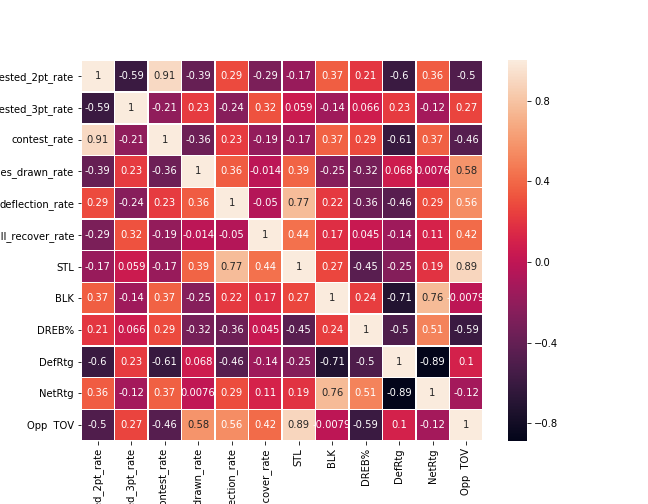

In [197]:
fig, ax = plt.subplots(figsize=(9,7))

sn.heatmap(defense_only.corr(), annot=True, linewidths=0.5, ax=ax)

In [198]:
stats_no17 = all_stats[~all_stats['TEAM'].str.contains(pat='2017')]
stats_no17

,TEAM,MIN,Screen Assists,Screen Assists PTS,Deflections,OFF Loose Balls Recovered,DEF Loose Balls Recovered,Loose Balls Recovered,% Loose Balls Recovered OFF,% Loose Balls Recovered DEF,Charges Drawn,Contested 2PT Shots,Contested 3PT Shots,Contested Shots,GP,W,L,WIN%,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,OffRtg,DefRtg,NetRtg,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TOV%,eFG%,TS%,PACE,PIE,Opp FGM,Opp FGA,Opp FG%,Opp 3PM,Opp 3PA,Opp 3P%,Opp FTM,Opp FTA,Opp FT%,Opp OREB,Opp DREB,Opp REB,Opp AST,Opp TOV,Opp STL,Opp BLK,Opp BLKA,Opp PF,Opp PFD,Opp PTS,deflection_rate,loose_ball_recover_rate,charges_drawn_rate,contest_rate,contested_2pt_rate,contested_3pt_rate
30,2018 Atlanta Hawks,96.1,11.3,25.9,13.8,3.7,4.7,8.4,43.8,56.1,0.91,40.2,23.9,64.1,82,24,58,0.293,103.4,38.2,85.5,44.6,11.2,31.0,36.0,15.8,20.2,78.5,9.1,32.8,41.9,23.7,15.5,7.8,4.2,5.5,19.6,20.3,-5.5,104.4,110.1,-5.7,62.2,1.53,17.6,26.3,71.9,48.9,15.7,51.2,54.7,98.76,46.8,40.7,86.7,46.9,11.6,30.7,37.7,15.9,20.6,77.2,10.3,34.0,44.2,26.1,15.1,8.7,5.5,4.2,20.3,19.6,108.8,0.140,0.085,0.009,0.649,0.407,0.242
31,2018 Boston Celtics,96.6,9.3,22.0,13.3,3.4,4.5,7.9,42.6,57.4,0.73,39.7,23.0,62.7,82,55,27,0.671,104.0,38.3,85.1,45.0,11.5,30.4,37.7,16.0,20.7,77.1,9.4,35.1,44.5,22.5,14.0,7.4,4.5,4.4,19.7,19.2,3.6,106.8,103.2,3.6,58.6,1.60,17.0,26.3,73.9,50.4,14.4,51.8,55.2,96.75,51.9,37.4,85.0,44.0,9.4,27.7,33.9,16.3,21.3,76.3,9.6,34.2,43.8,21.3,14.1,7.2,4.4,4.5,19.2,19.7,100.4,0.137,0.082,0.008,0.648,0.410,0.238
32,2018 Brooklyn Nets,96.9,9.4,22.8,12.8,3.5,4.7,8.1,42.8,57.2,0.55,48.5,19.4,67.8,82,28,54,0.341,106.6,38.2,86.8,44.1,12.7,35.7,35.6,17.4,22.6,77.2,9.7,34.8,44.4,23.7,15.2,6.2,4.8,5.5,20.6,19.7,-3.7,106.1,109.7,-3.6,61.9,1.56,17.3,25.1,73.1,48.9,15.1,51.4,55.1,99.66,47.4,41.7,89.4,46.6,9.0,24.5,36.9,17.9,23.4,76.6,10.4,36.4,46.8,21.7,12.4,7.7,5.5,4.8,19.7,20.6,110.3,0.128,0.081,0.006,0.680,0.487,0.195
33,2018 Charlotte Hornets,96.5,10.8,25.0,12.2,2.9,4.8,7.8,37.7,62.3,0.60,38.9,22.9,61.8,82,36,46,0.439,108.2,39.0,86.7,45.0,10.0,27.2,36.9,20.2,27.0,74.7,10.1,35.4,45.5,21.6,12.7,6.8,4.5,4.9,17.2,22.4,0.3,109.0,109.0,-0.1,55.4,1.70,16.1,27.1,76.3,51.2,12.8,50.8,54.9,98.66,50.0,41.1,87.8,46.8,11.3,30.1,37.5,14.5,18.2,79.5,8.4,35.3,43.7,24.7,13.6,6.6,4.9,4.5,22.4,17.2,108.0,0.124,0.079,0.006,0.626,0.394,0.232
34,2018 Chicago Bulls,96.9,9.2,21.2,13.7,3.2,4.7,7.9,40.3,59.7,0.21,38.5,25.7,64.2,82,27,55,0.329,102.9,38.7,88.8,43.5,11.0,31.1,35.5,14.6,19.2,75.9,9.6,35.0,44.7,23.5,14.0,7.6,3.5,5.2,19.2,17.4,-7.0,103.4,110.5,-7.0,60.7,1.68,17.3,25.6,76.7,50.0,14.1,49.7,52.9,98.65,45.3,41.0,86.8,47.2,12.1,32.7,37.0,15.9,20.2,78.7,8.4,37.2,45.7,25.9,13.6,7.2,5.2,3.5,17.4,19.2,110.0,0.139,0.080,0.002,0.651,0.390,0.261
35,2018 Cleveland Cavaliers,96.2,9.7,22.9,13.0,2.9,4.8,7.7,37.8,62.2,0.66,36.8,24.2,61.0,82,50,32,0.610,110.9,40.4,84.8,47.6,12.0,32.1,37.2,18.1,23.3,77.9,8.5,33.7,42.1,23.4,13.7,7.1,3.8,4.1,18.6,20.7,0.9,112.0,111.1,1.0,57.9,1.70,17.5,24.3,73.0,49.2,13.9,54.7,58.4,98.72,50.2,41.8,88.3,47.4,11.7,31.7,36.8,14.6,19.4,75.6,9.9,33.7,43.6,25.9,13.5,7.5,4.1,3.8,20.7,18.6,109.9,0.132,0.078,0.007,0.618,0.373,0.245
36,2018 Dallas Mavericks,96.6,9.6,22.4,13.1,3.8,4.8,8.6,43.8,56.2,0.68,37.8,24.1,61.9,82,24,58,0.293,102.3,38.1,85.9,44.4,11.8,32.8,36.0,14.2,18.7,76.3,8.1,33.1,41.3,22.7,12.3,7.0,3.8,4.5,19.2,19.6,-3.0,105.4,108.4,-2.9,59.4,1.85,17.3,22.4,74.9,47.8,12.7,51.3,54.4,96.53,47.5,39.3,83.8,46.9,10.7,29.4,36.3,16.2,21.4,75.7,8.8,36.9,45.8,23.5,13.7,7.2,4.5,3.8,19.6,19.2,105.4,0.136,0.089,0.007,0.641,0.392,0.250
37,2018 Denver Nuggets,97.0,8.4,19.1,14.6,3.7,4.9,8.6,43.1,56.9,0.65,40.0,23.1,63.1,82,46,36,0.561,110.0,40.7,86.6,47.0,11.5,30.9,37.1,17.1,22.3,76.7,11.0,33.5,44.5,25.1,15.0,7.6,4.9,4.8,18.7,20.7,1.5,111.4,110.0,1.4,61.7,1.68,18.2,30.0,73.6,51.7,15.1,53.6,57.0,97.69,51.1,41.3,86.7,47.6,10.9,28.8,37.8,15.0,20.4,73.8,9.8,31.9,41.6,24.7,13.8,8.0,4.8,4.9,20.7,18.7,108.5,0.149,0.088,0.007,0.646,0.409,0.236
38,2018 Detroit Pistons,96.6,11

In [199]:
no17_corr = stats_no17.corr()

no17_writer = pd.ExcelWriter("nba_stats_corr1820.xlsx", engine="xlsxwriter")

no17_corr.to_excel(no17_writer, sheet_name='correlations')

no17_writer.save()

In [200]:
stats_no17.columns.to_list()

['TEAM',
 'MIN',
 'Screen  Assists',
 'Screen  Assists PTS',
 'Deflections',
 'OFF Loose Balls  Recovered',
 'DEF Loose Balls  Recovered',
 'Loose Balls  Recovered',
 '% Loose Balls  Recovered OFF',
 '% Loose Balls  Recovered DEF',
 'Charges  Drawn',
 'Contested 2PT Shots',
 'Contested 3PT Shots',
 'Contested  Shots',
 'GP',
 'W',
 'L',
 'WIN%',
 'PTS',
 'FGM',
 'FGA',
 'FG%',
 '3PM',
 '3PA',
 '3P%',
 'FTM',
 'FTA',
 'FT%',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'TOV',
 'STL',
 'BLK',
 'BLKA',
 'PF',
 'PFD',
 '+/-',
 'OffRtg',
 'DefRtg',
 'NetRtg',
 'AST%',
 'AST/TO',
 'AST  Ratio',
 'OREB%',
 'DREB%',
 'REB%',
 'TOV%',
 'eFG%',
 'TS%',
 'PACE',
 'PIE',
 'Opp  FGM',
 'Opp  FGA',
 'Opp  FG%',
 'Opp  3PM',
 'Opp  3PA',
 'Opp  3P%',
 'Opp  FTM',
 'Opp  FTA',
 'Opp  FT%',
 'Opp  OREB',
 'Opp  DREB',
 'Opp  REB',
 'Opp  AST',
 'Opp  TOV',
 'Opp  STL',
 'Opp  BLK',
 'Opp  BLKA',
 'Opp  PF',
 'Opp  PFD',
 'Opp  PTS',
 'deflection_rate',
 'loose_ball_recover_rate',
 'charges_drawn_rate',
 'contest

In [242]:
reg_writer = pd.ExcelWriter("all_stats.xlsx", engine="xlsxwriter")


all_stats.to_excel(reg_writer, sheet_name='stats1720')
stats_no17.to_excel(reg_writer, sheet_name='stats1820')

reg_writer.save()

In [222]:
import statsmodels.api as sm

In [241]:
fig = px.scatter(stats_no17, x='deflection_rate', y='DefRtg', title='Deflection Rate vs. Defensive Rating',
                color='STL', trendline='ols', hover_data=['TEAM'])

fig.show()

results = px.get_trendline_results(fig)
results.px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     6.712
Date:                Thu, 25 Jun 2020   Prob (F-statistic):             0.0112
Time:                        13:07:51   Log-Likelihood:                -221.41
No. Observations:                  90   AIC:                             446.8
Df Residuals:                      88   BIC:                             451.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        116.7923      2.961     39.444      0.000     110.908     122.677
x1           -53.7282     20.738     -2.591      0.011     -94.941     -12.515
==============================================================================
Omnibus:                        0.026   Durbin-Watson:                   2.205
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.096
Skew:                          -0.039   Prob(JB):                        0.953
Kurtosis:                       2.860   Cond. No.                         70.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [240]:
fig = px.scatter(stats_no17, x='Loose Balls  Recovered', y='+/-', title='Loose Balls Recovered vs. Plus Minus',
                color='DefRtg',
                 trendline='ols', hover_data=['TEAM'])

fig.show()

results = px.get_trendline_results(fig)
results.px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.250
Date:                Thu, 25 Jun 2020   Prob (F-statistic):              0.137
Time:                        00:09:10   Log-Likelihood:                -266.81
No. Observations:                  90   AIC:                             537.6
Df Residuals:                      88   BIC:                             542.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.5902      6.422     -1.493      0.139     -22.353       3.173
x1             1.1881      0.792      1.500      0.137      -0.386       2.762
==============================================================================
Omnibus:                        1.282   Durbin-Watson:                   1.731
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.159
Skew:                          -0.110   Prob(JB):                        0.560
Kurtosis:                       2.490   Cond. No.                         106.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [238]:
fig = px.scatter(all_stats, x='contest_rate', y='DefRtg', title='Contest Rate vs. Defensive Rating',
                color='BLK', trendline='ols', hover_data=['TEAM'])

fig.show()

results = px.get_trendline_results(fig)
results.px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     19.98
Date:                Wed, 24 Jun 2020   Prob (F-statistic):           1.81e-05
Time:                        23:19:20   Log-Likelihood:                -285.73
No. Observations:                 120   AIC:                             575.5
Df Residuals:                     118   BIC:                             581.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        128.3863      4.365     29.414      0.000     119.743     137.030
x1           -30.8454      6.901     -4.470      0.000     -44.511     -17.179
==============================================================================
Omnibus:                        3.673   Durbin-Watson:                   2.244
Prob(Omnibus):                  0.159   Jarque-Bera (JB):                2.144
Skew:                           0.018   Prob(JB):                        0.342
Kurtosis:                       2.346   Cond. No.                         40.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [237]:
fig = px.scatter(all_stats, x='contested_2pt_rate', y='DefRtg', title='2PT Contest Rate vs. Defensive Rating',
                color='BLK', trendline='ols', hover_data=['TEAM'])

fig.show()

results = px.get_trendline_results(fig)
results.px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     24.26
Date:                Wed, 24 Jun 2020   Prob (F-statistic):           2.77e-06
Time:                        23:19:01   Log-Likelihood:                -283.90
No. Observations:                 120   AIC:                             571.8
Df Residuals:                     118   BIC:                             577.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.4511      2.558     47.476      0.000     116.385     126.517
x1           -31.5856      6.413     -4.925      0.000     -44.286     -18.885
==============================================================================
Omnibus:                        1.860   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.395   Jarque-Bera (JB):                1.425
Skew:                          -0.038   Prob(JB):                        0.490
Kurtosis:                       2.471   Cond. No.                         31.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [236]:
fig = px.scatter(all_stats, x='contested_3pt_rate', y='DefRtg', title='3PT Contest Rate vs. Defensive Rating',
                color='contest_rate',
                 trendline='ols', hover_data=['TEAM'])

fig.show()

results = px.get_trendline_results(fig)
results.px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.037
Date:                Wed, 24 Jun 2020   Prob (F-statistic):              0.311
Time:                        23:16:40   Log-Likelihood:                -294.59
No. Observations:                 120   AIC:                             593.2
Df Residuals:                     118   BIC:                             598.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.9904      2.876     36.855      0.000     100.295     111.685
x1            12.4425     12.220      1.018      0.311     -11.757      36.641
==============================================================================
Omnibus:                        0.055   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.973   Jarque-Bera (JB):                0.003
Skew:                          -0.000   Prob(JB):                        0.998
Kurtosis:                       2.974   Cond. No.                         49.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [239]:
fig = px.scatter(all_stats, x='Opp  3PA', y='DefRtg', title='Opponent 3PT Attempts vs. Defensive Rating',
                color='contested_3pt_rate', trendline='ols', hover_data=['TEAM'])

fig.show()

results = px.get_trendline_results(fig)
results.px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     10.49
Date:                Wed, 24 Jun 2020   Prob (F-statistic):            0.00156
Time:                        23:21:34   Log-Likelihood:                -290.00
No. Observations:                 120   AIC:                             584.0
Df Residuals:                     118   BIC:                             589.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.5987      2.271     44.745      0.000      97.102     106.095
x1             0.2397      0.074      3.238      0.002       0.093       0.386
==============================================================================
Omnibus:                        2.439   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                1.917
Skew:                          -0.210   Prob(JB):                        0.384
Kurtosis:                       3.456   Cond. No.                         279.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [234]:
fig = px.scatter(all_stats, x='Opp  BLK', y='DefRtg', 
                 title='Opponent Blocked Shots vs. Defensive Rating',
                color='Opp  STL', trendline='ols', hover_data=['TEAM'])

fig.show()

results = px.get_trendline_results(fig)
results.px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     27.38
Date:                Wed, 24 Jun 2020   Prob (F-statistic):           7.37e-07
Time:                        23:14:18   Log-Likelihood:                -282.59
No. Observations:                 120   AIC:                             569.2
Df Residuals:                     118   BIC:                             574.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.1044      1.888     52.489      0.000      95.365     102.843
x1             2.0162      0.385      5.232      0.000       1.253       2.779
==============================================================================
Omnibus:                        0.372   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.830   Jarque-Bera (JB):                0.505
Skew:                          -0.115   Prob(JB):                        0.777
Kurtosis:                       2.781   Cond. No.                         41.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
fig = px.scatter(stats_no17, x='DEF Loose Balls  Recovered', y='DefRtg', 
                 title='Defensive Loose Balls Recovered vs. Defensive Rating',
                color='Loose Balls  Recovered',
                 trendline='ols', hover_data=['TEAM'])

fig.show()

results = px.get_trendline_results(fig)
results.px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     18.70
Date:                Wed, 24 Jun 2020   Prob (F-statistic):           2.54e-05
Time:                        00:46:46   Log-Likelihood:                -446.88
No. Observations:                 180   AIC:                             897.8
Df Residuals:                     178   BIC:                             904.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        116.5235      1.630     71.509      0.000     113.308     119.739
x1            -1.6801      0.388     -4.325      0.000      -2.447      -0.914
==============================================================================
Omnibus:                        3.754   Durbin-Watson:                   1.264
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                3.563
Skew:                          -0.344   Prob(JB):                        0.168
Kurtosis:                       3.027   Cond. No.                         33.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [232]:
fig = px.scatter(all_stats, x='BLKA', y='+/-', 
                 title='Opponent Blocked Shots vs. Plus Minus',
                color='Opp  STL', trendline='ols', hover_data=['TEAM'])

fig.show()

results = px.get_trendline_results(fig)
results.px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     43.09
Date:                Wed, 24 Jun 2020   Prob (F-statistic):           1.46e-09
Time:                        23:09:41   Log-Likelihood:                -335.45
No. Observations:                 120   AIC:                             674.9
Df Residuals:                     118   BIC:                             680.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.1148      2.933      6.517      0.000      13.307      24.923
x1            -3.9297      0.599     -6.565      0.000      -5.115      -2.744
==============================================================================
Omnibus:                        0.394   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.821   Jarque-Bera (JB):                0.501
Skew:                           0.127   Prob(JB):                        0.778
Kurtosis:                       2.811   Cond. No.                         41.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [233]:
fig = px.scatter(all_stats, x='BLKA', y='OffRtg', 
                 title='Opponent Blocked Shots vs. Offensive Rating',
                color='Opp  STL', trendline='ols', hover_data=['TEAM'])

fig.show()

results = px.get_trendline_results(fig)
results.px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     17.64
Date:                Wed, 24 Jun 2020   Prob (F-statistic):           5.21e-05
Time:                        23:10:04   Log-Likelihood:                -297.36
No. Observations:                 120   AIC:                             598.7
Df Residuals:                     118   BIC:                             604.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        117.8109      2.135     55.172      0.000     113.582     122.039
x1            -1.8303      0.436     -4.200      0.000      -2.693      -0.967
==============================================================================
Omnibus:                        6.245   Durbin-Watson:                   2.264
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                3.140
Skew:                          -0.126   Prob(JB):                        0.208
Kurtosis:                       2.249   Cond. No.                         41.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [245]:
stats_no17.columns.to_list()

['TEAM',
 'MIN',
 'Screen  Assists',
 'Screen  Assists PTS',
 'Deflections',
 'OFF Loose Balls  Recovered',
 'DEF Loose Balls  Recovered',
 'Loose Balls  Recovered',
 '% Loose Balls  Recovered OFF',
 '% Loose Balls  Recovered DEF',
 'Charges  Drawn',
 'Contested 2PT Shots',
 'Contested 3PT Shots',
 'Contested  Shots',
 'GP',
 'W',
 'L',
 'WIN%',
 'PTS',
 'FGM',
 'FGA',
 'FG%',
 '3PM',
 '3PA',
 '3P%',
 'FTM',
 'FTA',
 'FT%',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'TOV',
 'STL',
 'BLK',
 'BLKA',
 'PF',
 'PFD',
 '+/-',
 'OffRtg',
 'DefRtg',
 'NetRtg',
 'AST%',
 'AST/TO',
 'AST  Ratio',
 'OREB%',
 'DREB%',
 'REB%',
 'TOV%',
 'eFG%',
 'TS%',
 'PACE',
 'PIE',
 'Opp  FGM',
 'Opp  FGA',
 'Opp  FG%',
 'Opp  3PM',
 'Opp  3PA',
 'Opp  3P%',
 'Opp  FTM',
 'Opp  FTA',
 'Opp  FT%',
 'Opp  OREB',
 'Opp  DREB',
 'Opp  REB',
 'Opp  AST',
 'Opp  TOV',
 'Opp  STL',
 'Opp  BLK',
 'Opp  BLKA',
 'Opp  PF',
 'Opp  PFD',
 'Opp  PTS',
 'deflection_rate',
 'loose_ball_recover_rate',
 'charges_drawn_rate',
 'contest

In [250]:
franchises = stats_no17['TEAM'].str.split(' ', n = 1, expand = True)
stats_no17['Franchise'] = franchises[1]

hustle_and_oppblk = stats_no17[['TEAM', 'Screen  Assists','Screen  Assists PTS','Deflections','OFF Loose Balls  Recovered',
 'DEF Loose Balls  Recovered','Loose Balls  Recovered',
 'Charges  Drawn',
 'Contested 2PT Shots',
 'Contested 3PT Shots',
 'Contested  Shots',
'deflection_rate',
 'loose_ball_recover_rate',
 'charges_drawn_rate',
 'contest_rate',
 'contested_2pt_rate',
 'contested_3pt_rate',
'+/-',
 'BLKA',
 'OffRtg',
 'DefRtg',
 'NetRtg']]
hustle_and_oppblk

,TEAM,Screen Assists,Screen Assists PTS,Deflections,OFF Loose Balls Recovered,DEF Loose Balls Recovered,Loose Balls Recovered,Charges Drawn,Contested 2PT Shots,Contested 3PT Shots,Contested Shots,deflection_rate,loose_ball_recover_rate,charges_drawn_rate,contest_rate,contested_2pt_rate,contested_3pt_rate,+/-,BLKA,OffRtg,DefRtg,NetRtg
30,2018 Atlanta Hawks,11.3,25.9,13.8,3.7,4.7,8.4,0.91,40.2,23.9,64.1,0.140,0.085,0.009,0.649,0.407,0.242,-5.5,5.5,104.4,110.1,-5.7
31,2018 Boston Celtics,9.3,22.0,13.3,3.4,4.5,7.9,0.73,39.7,23.0,62.7,0.137,0.082,0.008,0.648,0.410,0.238,3.6,4.4,106.8,103.2,3.6
32,2018 Brooklyn Nets,9.4,22.8,12.8,3.5,4.7,8.1,0.55,48.5,19.4,67.8,0.128,0.081,0.006,0.680,0.487,0.195,-3.7,5.5,106.1,109.7,-3.6
33,2018 Charlotte Hornets,10.8,25.0,12.2,2.9,4.8,7.8,0.60,38.9,22.9,61.8,0.124,0.079,0.006,0.626,0.394,0.232,0.3,4.9,109.0,109.0,-0.1
34,2018 Chicago Bulls,9.2,21.2,13.7,3.2,4.7,7.9,0.21,38.5,25.7,64.2,0.139,0.080,0.002,0.651,0.390,0.261,-7.0,5.2,103.4,110.5,-7.0
35,2018 Cleveland Cavaliers,9.7,22.9,13.0,2.9,4.8,7.7,0.66,36.8,24.2,61.0,0.132,0.078,0.007,0.618,0.373,0.245,0.9,4.1,112.0,111.1,1.0
36,2018 Dallas Mavericks,9.6,22.4,13.1,3.8,4.8,8.6,0.68,37.8,24.1,61.9,0.136,0.089,0.007,0.641,0.392,0.250,-3.0,4.5,105.4,108.4,-2.9
37,2018 Denver Nuggets,8.4,19.1,14.6,3.7,4.9,8.6,0.65,40.0,23.1,63.1,0.149,0.088,0.007,0.646,0.409,0.236,1.5,4.8,111.4,110.0,1.4
38,2018 Detroit Pistons,11.0,24.6,13.8,3.1,4.9,8.0,0.80,36.6,23.1,59.7,0.143,0.083,0.008,0.617,0.378,0.239,-0.1,4.9,106.6,106.7,-0.1
39,2018 Golden State Warriors,10.9,26.1,14.9,3.2,5.0,8.2,0.24,44.8,23.2,68.0,0.148,0.082,0.002,0.678,0.446,0.231,6.0,3.7,112.8,106.8,5.9


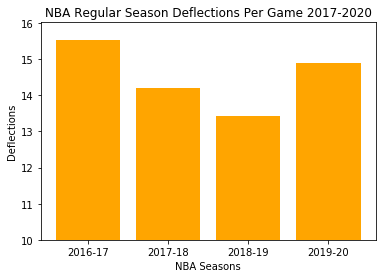

In [129]:
seasons = ["2016-17", "2017-18", "2018-19", "2019-20"]
last3_nba_seasons = [hustle17["Deflections"].mean(), hustle18["Deflections"].mean(), 
                  hustle19["Deflections"].mean(), hustle20["Deflections"].mean()]

plt.bar(seasons, last3_nba_seasons, color="orange", align="center")
plt.title("NBA Regular Season Deflections Per Game 2017-2020")
plt.xlabel("NBA Seasons")
plt.ylabel("Deflections")
plt.ylim(10, max(last3_nba_seasons)+0.5)

plt.savefig("deflections_per_game.png")

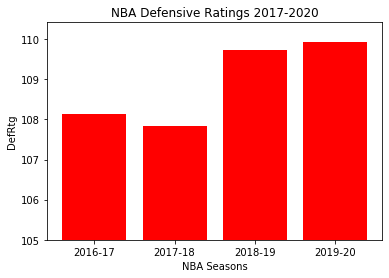

In [128]:
three_seasons_adv = [adv17['DefRtg'].mean(), adv18['DefRtg'].mean(),
                     adv19['DefRtg'].mean(), adv20['DefRtg'].mean()]

plt.bar(seasons, three_seasons_adv, color="red", align="center")
plt.title("NBA Defensive Ratings 2017-2020")
plt.xlabel("NBA Seasons")
plt.ylabel("DefRtg")
plt.ylim(105, max(three_seasons_adv)+0.5)

plt.savefig("drtg.png")

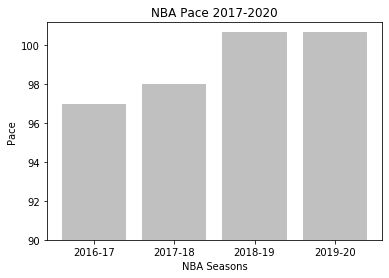

In [130]:
three_seasons_pace = [adv17['PACE'].mean(), adv18['PACE'].mean(),
                      adv19['PACE'].mean(), adv20['PACE'].mean()]

plt.bar(seasons, three_seasons_pace, color="silver", align="center")
plt.title("NBA Pace 2017-2020")
plt.xlabel("NBA Seasons")
plt.ylabel("Pace")
plt.ylim(90, max(three_seasons_pace)+0.5)

plt.savefig("pace.png")

<IPython.core.display.Javascript object>


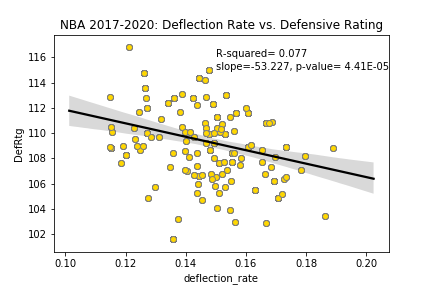

In [134]:
%matplotlib notebook

x_axis = all_stats["deflection_rate"]
y_axis = all_stats["DefRtg"]

#Fit regression lines
slope, intercept, r_value, p_value, std_err = stats.linregress(x_axis, y_axis)
r   = "{:.3f}".format(r_value**2)
slp = "{:.3f}".format(slope)
pv  = "{:.2E}".format(p_value)
textbox1 = f"R-squared= {r}"
textbox2 = f"slope={slp}, p-value= {pv}"

#Plot scatterplot and regression line
sn.regplot(x=x_axis, y=y_axis, data=all_stats, color="black")
x_axis = all_stats["deflection_rate"]
y_axis = all_stats["DefRtg"]


plt.scatter(x_axis, y_axis, marker="o", facecolors="gold", edgecolors="grey", alpha=1)
plt.text(0.15,116,textbox1, size='medium', weight='light', fontsize=10)
plt.text(0.15,115,textbox2, size='medium', weight='light', fontsize=10)

#Edit
plt.title("NBA 2017-2020: Deflection Rate vs. Defensive Rating")

#Show ad save figure
plt.savefig("deflection_rate_vs_drtg.png")
plt.show()

<IPython.core.display.Javascript object>


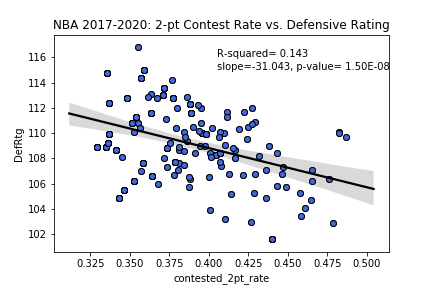

In [136]:
%matplotlib notebook

#Fit regression lines
slope, intercept, r_value, p_value, std_err = stats.linregress(x_axis, y_axis)
r   = "{:.3f}".format(r_value**2)
slp = "{:.3f}".format(slope)
pv  = "{:.2E}".format(p_value)
textbox1 = f"R-squared= {r}"
textbox2 = f"slope={slp}, p-value= {pv}"

#Plot scatterplot and regression line
sn.regplot(x=x_axis, y=y_axis, data=all_stats, color="black")
x_axis = all_stats["contested_2pt_rate"]
y_axis = all_stats["DefRtg"]


plt.scatter(x_axis, y_axis, marker="o", facecolors="royalblue", edgecolors="black", alpha=1)
plt.text(0.405,116,textbox1, size='medium', weight='light', fontsize=10)
plt.text(0.405,115,textbox2, size='medium', weight='light', fontsize=10)

#Edit
plt.title("NBA 2017-2020: 2-pt Contest Rate vs. Defensive Rating")

#Show ad save figure
plt.savefig("2pt_contest_rate_drtg.png")
plt.show()

<IPython.core.display.Javascript object>


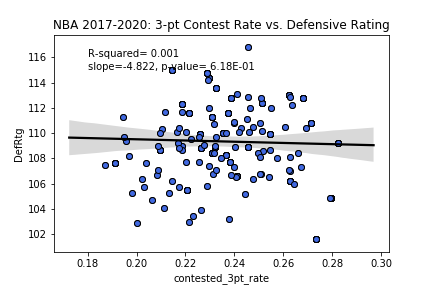

In [137]:
%matplotlib notebook

x_axis = all_stats["contested_3pt_rate"]
y_axis = all_stats["DefRtg"]

#Fit regression lines
slope, intercept, r_value, p_value, std_err = stats.linregress(x_axis, y_axis)
r   = "{:.3f}".format(r_value**2)
slp = "{:.3f}".format(slope)
pv  = "{:.2E}".format(p_value)
textbox1 = f"R-squared= {r}"
textbox2 = f"slope={slp}, p-value= {pv}"

#Plot scatterplot and regression line
sn.regplot(x=x_axis, y=y_axis, data=all_stats, color="black")
x_axis = all_stats["contested_3pt_rate"]
y_axis = all_stats["DefRtg"]


plt.scatter(x_axis, y_axis, marker="o", facecolors="royalblue", edgecolors="black", alpha=1)
plt.text(0.18,116,textbox1, size='medium', weight='light', fontsize=10)
plt.text(0.18,115,textbox2, size='medium', weight='light', fontsize=10)

#Edit
plt.title("NBA 2017-2020: 3-pt Contest Rate vs. Defensive Rating")

#Show ad save figure
plt.savefig("3pt_contest_rate_drtg.png")
plt.show()

In [139]:
hustle17.columns.to_list()

['TEAM',
 'MIN',
 'Screen  Assists',
 'Screen  Assists PTS',
 'Deflections',
 'OFF Loose Balls  Recovered',
 'DEF Loose Balls  Recovered',
 'Loose Balls  Recovered',
 '% Loose Balls  Recovered OFF',
 '% Loose Balls  Recovered DEF',
 'Charges  Drawn',
 'Contested  2PT\xa0Shots',
 'Contested  3PT\xa0Shots',
 'Contested  Shots']

In [141]:
hustle_list = [hustle17, hustle18, hustle19, hustle20]

for df in hustle_list:
    df.rename(columns={'Contested  2PT\xa0Shots': 'Contested 2PT Shots', 'Contested  3PT\xa0Shots': 'Contested 3PT Shots'},
             inplace=True)

<IPython.core.display.Javascript object>


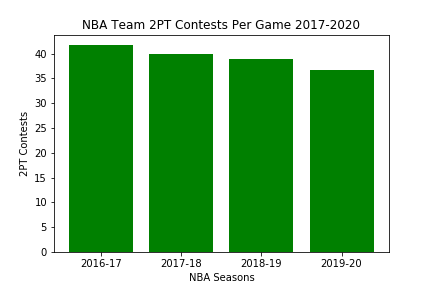

In [143]:
seasons = ["2016-17", "2017-18", "2018-19", "2019-20"]
two_pt_contests = [hustle17["Contested 2PT Shots"].mean(), hustle18["Contested 2PT Shots"].mean(), 
                  hustle19["Contested 2PT Shots"].mean(), hustle20["Contested 2PT Shots"].mean()]

plt.bar(seasons, two_pt_contests, color="green", align="center")
plt.title("NBA Team 2PT Contests Per Game 2017-2020")
plt.xlabel("NBA Seasons")
plt.ylabel("2PT Contests")
plt.savefig("2pt_contests_per_game.png")